In [57]:
import pandas as pd

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [59]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [60]:
df.shape

(13320, 9)

In [61]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [62]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Basic info and missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
missing_percentage = (df.isnull().sum() * 100)/len(df)
print(f"Overall missing percentage:\n {missing_percentage}%")

Overall missing percentage:
 area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64%


In [13]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [16]:
df.duplicated().sum()

np.int64(529)

In [17]:
df = df.drop_duplicates()

In [18]:
df.shape

(12791, 9)

### Univariate analysis on numerical columns

In [21]:
unique_values = df['total_sqft'].unique()

In [31]:
# for value in unique_values:
#     print(value)

In [24]:
def convert_sqft(x):
    try:
        if '-' in str(x):
            a, b = map(float, x.split('-'))
            return (a + b) / 2
        return float(x)
    except:
        return None

In [27]:
df['total_sqft_num'] = df['total_sqft'].apply(convert_sqft)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3716\1990612710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft_num'] = df['total_sqft'].apply(convert_sqft)


In [28]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,total_sqft_num
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,1200.0


In [29]:
num_cols_clean = ['total_sqft_num', 'bath', 'balcony', 'price']

In [30]:
print(df[num_cols_clean].describe().round(2))

       total_sqft_num      bath   balcony     price
count        12745.00  12718.00  12186.00  12791.00
mean          1569.60      2.71      1.58    114.32
std           1259.83      1.36      0.82    151.48
min              1.00      1.00      0.00      8.00
25%           1100.00      2.00      1.00     50.00
50%           1280.00      2.00      2.00     73.00
75%           1691.00      3.00      2.00    121.00
max          52272.00     40.00      3.00   3600.00


##### price and total_sqft are heavily right-skewed

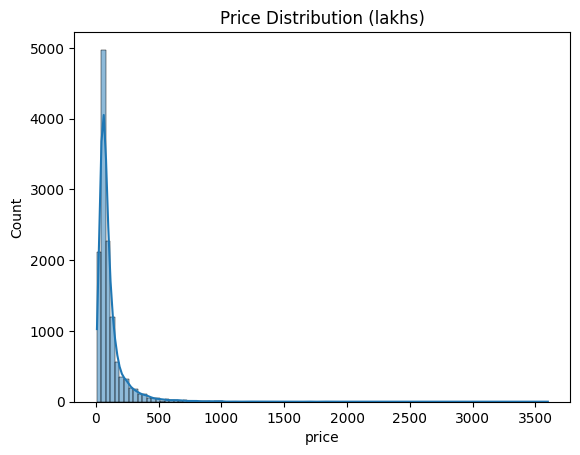

In [33]:
fig, ax = plt.subplots()
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Price Distribution (lakhs)')
plt.show()

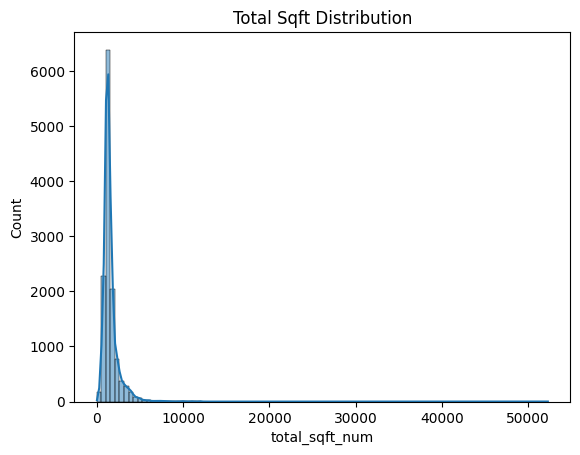

In [34]:
fig, ax = plt.subplots()
sns.histplot(df['total_sqft_num'].dropna(), bins=100, kde=True)
plt.title('Total Sqft Distribution')
plt.show()

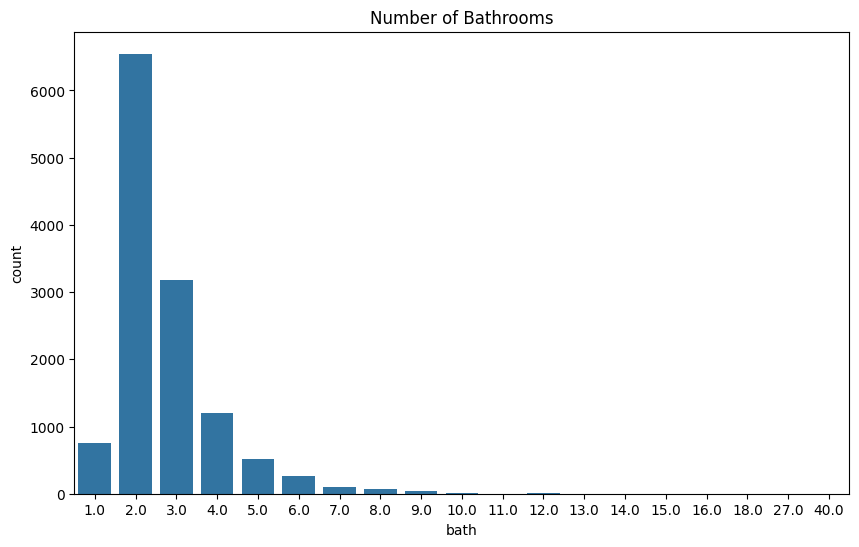

In [37]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x='bath', data=df)
plt.title('Number of Bathrooms')
plt.show()

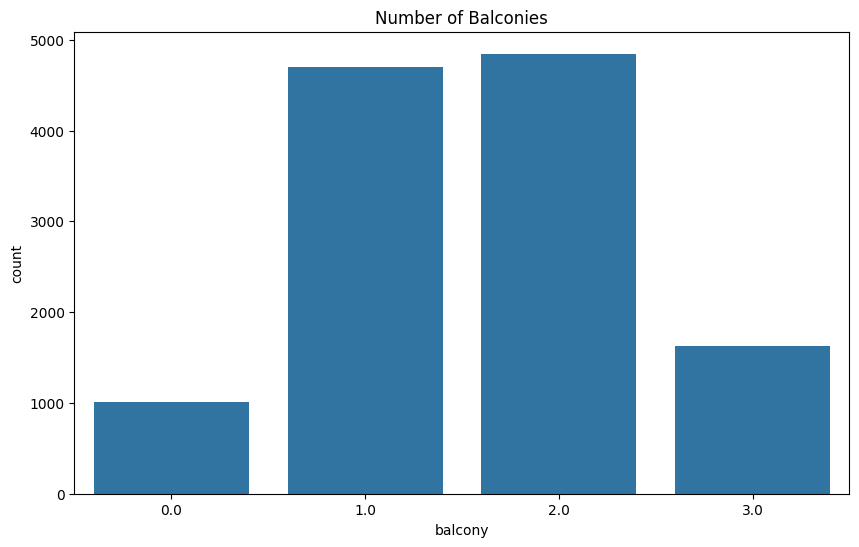

In [39]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x='balcony', data=df)
plt.title('Number of Balconies')
plt.show()

### Univariate Analysis on categorical columns

In [40]:
cat_cols = ['area_type', 'availability', 'location', 'size', 'society']

In [41]:
print(df['area_type'].value_counts(dropna=False).head(10))

area_type
Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64


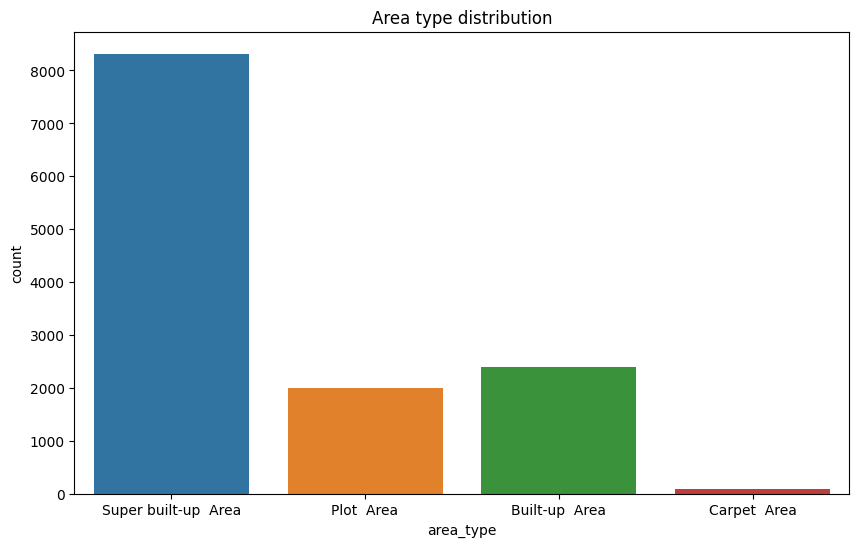

In [43]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x='area_type', data=df, hue = 'area_type')
plt.title('Area type distribution')
plt.show()

In [47]:
print(df['availability'].value_counts(dropna=False).head(10))

availability
Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
19-Dec             176
18-Jul             131
18-Mar             130
18-Jun              98
20-Dec              94
Name: count, dtype: int64


In [50]:
print(df['location'].value_counts(dropna=False).head(10))

location
Whitefield               523
Sarjapur  Road           379
Electronic City          287
Kanakpura Road           249
Thanisandra              229
Yelahanka                210
Marathahalli             169
Hebbal                   161
Raja Rajeshwari Nagar    159
Uttarahalli              157
Name: count, dtype: int64


In [53]:
print(df['size'].value_counts(dropna=False).head(10))

size
2 BHK        4931
3 BHK        4120
4 Bedroom     824
4 BHK         574
3 Bedroom     535
1 BHK         521
2 Bedroom     314
5 Bedroom     291
6 Bedroom     191
1 Bedroom     104
Name: count, dtype: int64


In [54]:
print(df['society'].value_counts(dropna=False).head(10))

society
NaN        5328
GrrvaGr      68
PrarePa      63
Sryalan      56
Prtates      54
GMown E      52
Bhmesy       51
Prarkun      48
IBityin      45
PrityTr      42
Name: count, dtype: int64


In [55]:
df[df['bath']>= 27]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,total_sqft_num
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,NaN,8000,27.0,0.0,230.0,8000.0
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0,2400.0


In [63]:
def extract_bhk(x):
    try:
        x = str(x).lower()
        if 'rk' in x:
            return 1
        return int(x.split()[0])
    except:
        return None

df['bhk'] = df['size'].apply(extract_bhk)

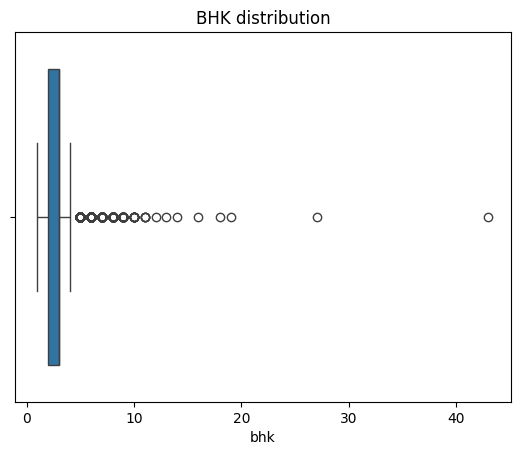

In [66]:
fig, ax = plt.subplots()
sns.boxplot(x = 'bhk', data = df)
plt.title('BHK distribution')
plt.show()

In [67]:
df['bhk'].describe()

count    13304.000000
mean         2.803743
std          1.294974
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: bhk, dtype: float64

In [70]:
df['bhk'].quantile(0.90)

np.float64(4.0)

In [71]:
df['bhk'].quantile(0.95)

np.float64(5.0)

In [72]:
df['bhk'].quantile(0.98)

np.float64(7.0)

In [73]:
df['bhk'].quantile(0.99)

np.float64(8.0)

## 🔑 Key Points and Actionable Takeaways

### 1. Target Variable (Price in Lakhs)
- **Observations**: Highly right-skewed distribution; most houses fall in the 40–150 lakhs range; right tail suggests luxury/outlier properties.  
- **Actions**: Apply log(price) or log1p(price) transformation to reduce skew and improve model performance.

### 2. Total Square Feet
- **Observations**: Stored as object type, requires cleaning; after parsing, distribution is right-skewed with bulk of properties between ~800–2,500 sqft.  
- **Actions**: Use a custom function to convert ranges to averages and normalize units to sqft.

### 3. Bathrooms
- **Observations**: ~0.5% missing values; clear outliers at 27 and 40 bathrooms.  
- **Actions**: Cap extreme values or treat them as invalid; impute missing values if necessary.

### 4. Balcony
- **Observations**: ~5.6% missing values.  
- **Actions**: Safe to impute with median values.

### 5. Area Type
- **Observations**: Only 4 categories, heavily imbalanced.  
- **Actions**: Apply one-hot encoding.

### 6. Location
- **Observations**: ~0.0075% missing values; many locations appear fewer than 10 times → noisy/sparse.  
- **Actions**: Group rare locations into an "Other" category.

### 7. Size
- **Observations**: ~0.12% missing values; inconsistent labeling ("2 BHK" vs "4 Bedroom" vs "3 Bedroom").  
- **Actions**: Extract numeric bedroom counts for feature engineering.

### 8. Society
- **Observations**: High missing rates (41–50%).  
- **Actions**: Create a binary flag (has society vs missing).
